In [3]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import os

sns.set(rc={'figure.figsize':(20,14)})

In [5]:
data_folder = "../data/nemea_results__20210222"

os.system(f"p=$(pwd) && cd {data_folder} && python3 $p/benchmark_to_csv.py .")

def fancy_name(benchmark_name):
    return benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "") #.replace("_1", "")
    return benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "") #.replace("_1", "")
high_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_high_level.csv")
high_level = high_level.sort_values("benchmark_run_name")
high_level = high_level[~high_level["benchmark_run_name"].str.match(".*simdbp.*")]
high_level["fancy_name"] = [fancy_name(b) for b in high_level["benchmark_run_name"]]
high_level

,benchmark_run_name,total_runtime,avg_throughput,fancy_name
2,./tpch_bitpacking_compactvector_1.json,1.842623e+09,1.350450,./bitpacking_compactvector_1
1,./tpch_bitpacking_compactvector_LTO_1.json,1.779139e+09,1.400669,./bitpacking_compactvector_1
7,./tpch_bitpacking_turbopfor_1.json,1.786810e+09,1.451568,./bitpacking_turbopfor_1
0,./tpch_bitpacking_turbopfor_LTO_1.json,1.750130e+09,1.501219,./bitpacking_turbopfor_1
8,./tpch_bitpacking_turbopfor_seq_1.json,1.988951e+09,1.218464,./bitpacking_turbopfor_seq_1
3,./tpch_bitpacking_turbopfor_seq_LTO_1.json,1.885914e+09,1.320421,./bitpacking_turbopfor_seq_1
4,./tpch_dictionary_1.json,1.727273e+09,1.574977,./dictionary_1
11,./tpch_dictionary_LTO_1.json,1.709354e+09,1.582521,./dictionary_1
5,./tpch_fsba_1.json,1.774212e+09,1.520869,./fsba_1
9,./tpch_fsba_LTO_1.json,1.682039e+09,1.605564,./fsba_1


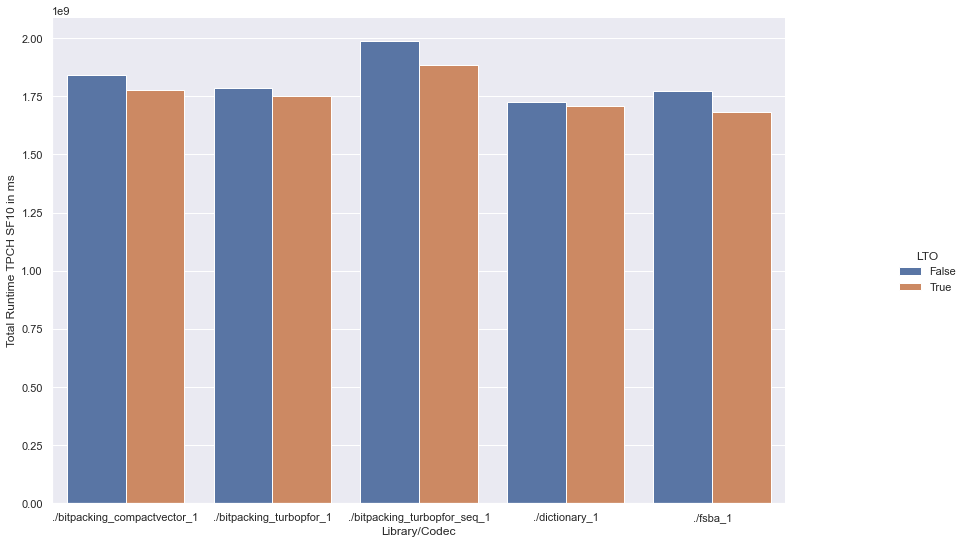

In [7]:
   
# https://stackoverflow.com/questions/28904397/how-to-set-the-value-of-the-axis-multiplier-in-matplotlib
class MagnitudeFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, exponent=None):
        super().__init__()
        self._fixed_exponent = exponent

    def _set_order_of_magnitude(self):
        if self._fixed_exponent:
            self.orderOfMagnitude = self._fixed_exponent
        else:
            super()._set_order_of_magnitude()

high_level["LTO"] = high_level["benchmark_run_name"].str.match(".*LTO.*")
plot = sns.catplot(data=high_level, x="fancy_name", y="total_runtime", kind="bar", hue="LTO")
plot.set_axis_labels("Library/Codec", "Total Runtime TPCH SF10 in ms")
plot.fig.set_size_inches(15,8)
for ax in plot.axes.flat:
    ax.yaxis.set_major_formatter(MagnitudeFormatter(9))
plt.savefig(f"visualizations/tpch_compression_high_level_both.svg", format="svg")

#plot_high_level(
 #   high_level[high_level["benchmark_run_name"].str.match(".*LTO.*")],
 #   "tpch_compression_high_level_with_lto")

<AxesSubplot:xlabel='Library/Codec', ylabel='Total Runtime TPCH SF10 in ms'>

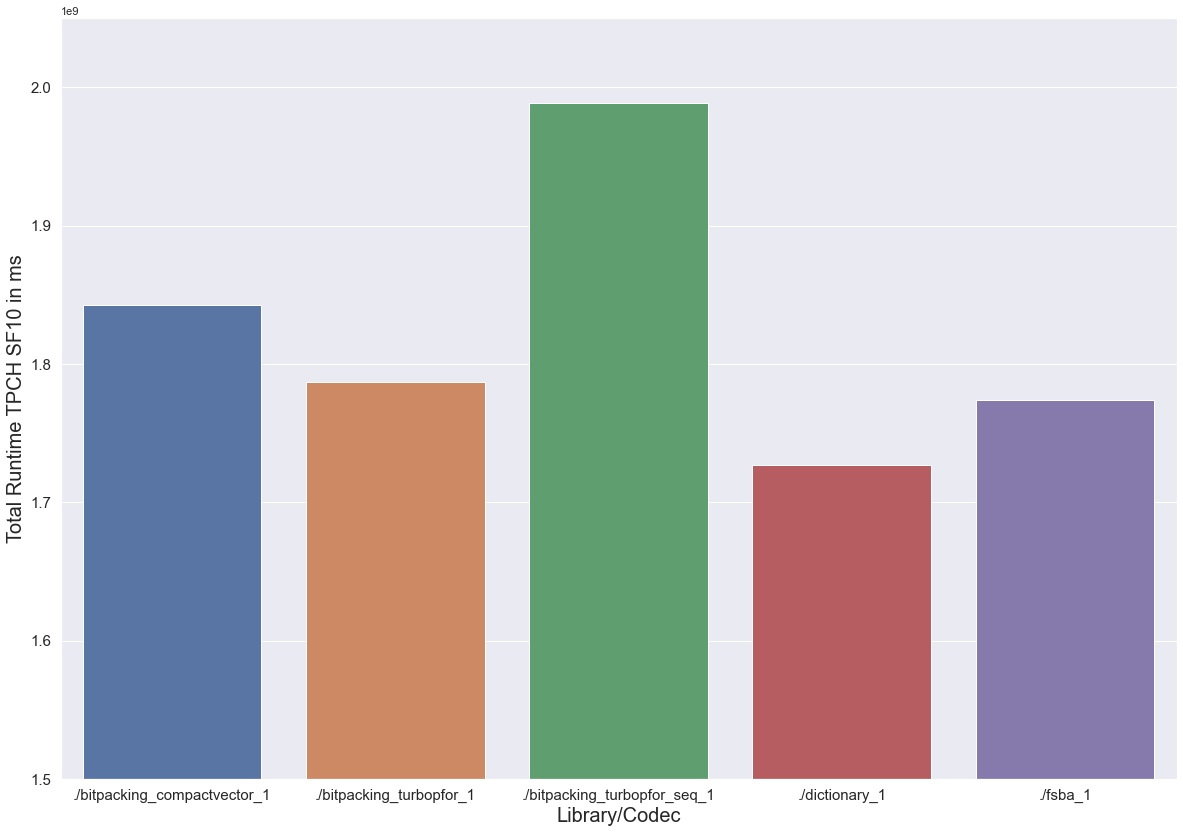

In [9]:
def plot_high_level(d, filename, plot=None):
    plt.tight_layout()
    if plot is None:
        plot = sns.barplot(data=d, x="fancy_name", y="total_runtime")
    plot.set(ylim=(1.5 * 10**9, 2.05 * 10**9))
    plot.set_xlabel("Library/Codec",fontsize=20)
    plot.set_ylabel("Total Runtime TPCH SF10 in ms",fontsize=20) 
    plot.tick_params(labelsize=15)

    plt.savefig(f"visualizations/{filename}.svg", format="svg")
    return plot
plot_high_level(
    high_level[~high_level["benchmark_run_name"].str.match(".*LTO.*")],
    "tpch_compression_high_level_without_lto")

In [18]:
low_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_low_level.csv")
low_level = low_level.sort_values("query_name")
low_level = low_level[~low_level["benchmark_run_name"].str.match(".*(simdbp|dict).*")]
low_level["fancy_name"] = [fancy_name(b) for b in low_level["benchmark_run_name"]]
low_level["query_name"] = [b.replace("TPC-H ", "") for b in low_level["query_name"]]
low_level

,benchmark_run_name,query_name,avg_duration,throughput,fancy_name
0,./tpch_bitpacking_turbopfor_LTO_1.json,01,5.456570e+09,0.183265,./bitpacking_turbopfor_1
22,./tpch_bitpacking_compactvector_LTO_1.json,01,5.799793e+09,0.172420,./bitpacking_compactvector_1
44,./tpch_bitpacking_compactvector_1.json,01,5.918221e+09,0.168969,./bitpacking_compactvector_1
198,./tpch_fsba_LTO_1.json,01,5.355521e+09,0.186723,./fsba_1
66,./tpch_bitpacking_turbopfor_seq_LTO_1.json,01,7.107306e+09,0.140700,./bitpacking_turbopfor_seq_1
...,...,...,...,...,...
175,./tpch_bitpacking_turbopfor_1.json,22,4.588953e+08,2.179123,./bitpacking_turbopfor_1
87,./tpch_bitpacking_turbopfor_seq_LTO_1.json,22,4.570028e+08,2.188148,./bitpacking_turbopfor_seq_1
65,./tpch_bitpacking_compactvector_1.json,22,4.790417e+08,2.087479,./bitpacking_compactvector_1
43,./tpch_bitpacking_compactvector_LTO_1.json,22,4.593012e+08,2.177198,./bitpacking_compactvector_1


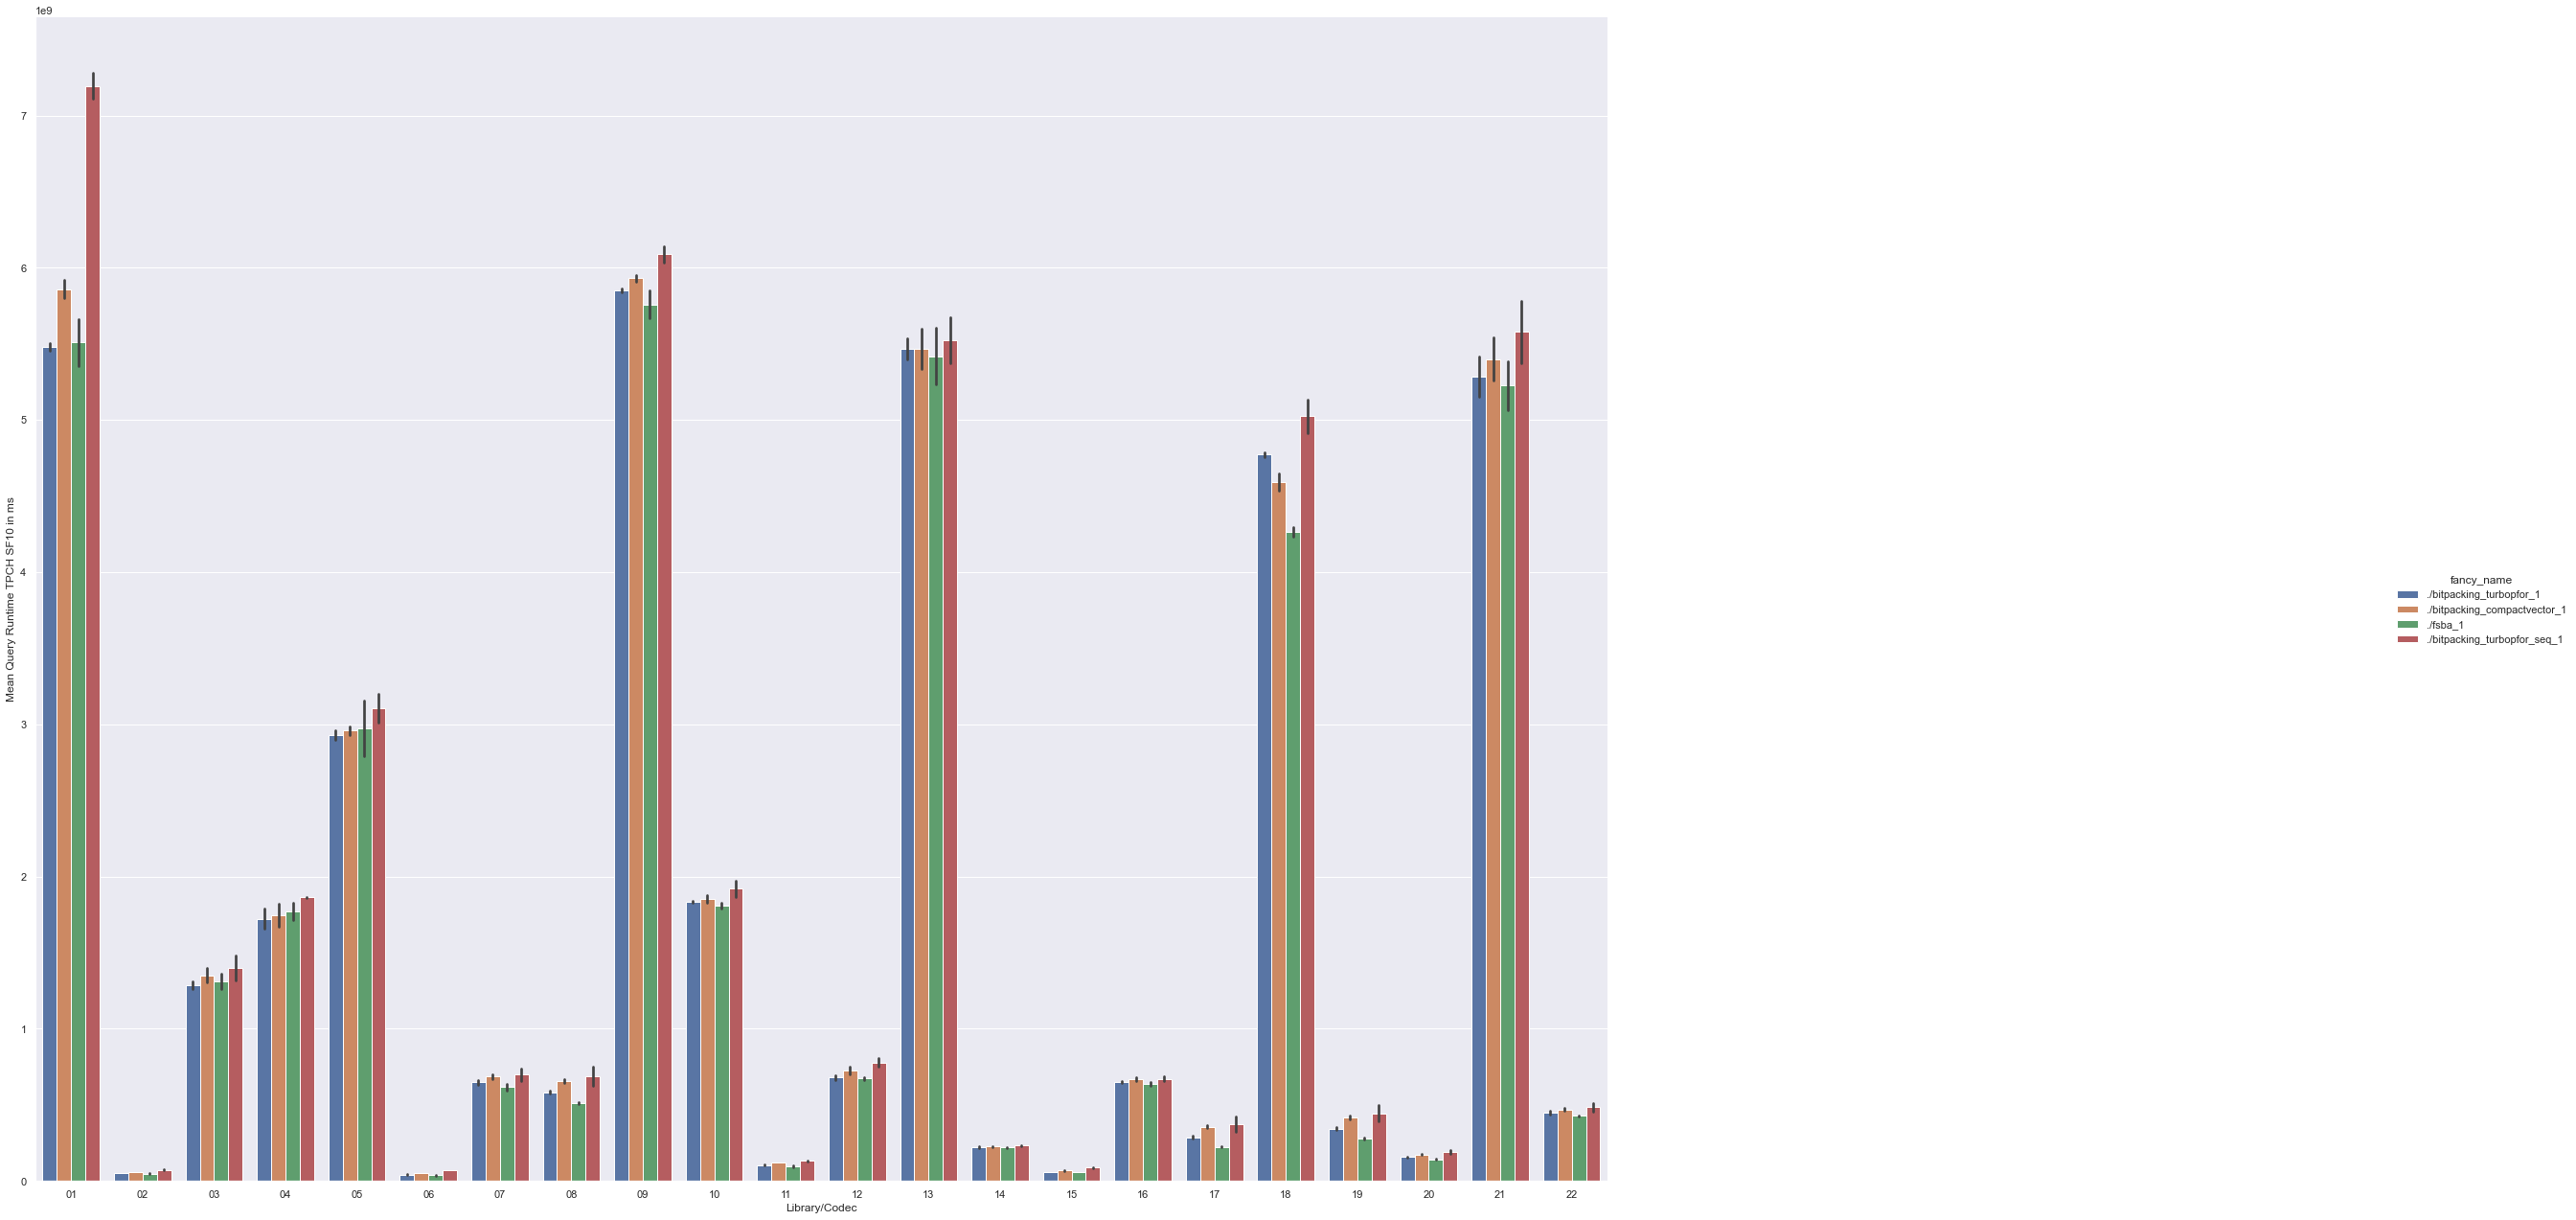

In [19]:
plot = sns.catplot(data=low_level, x="query_name", y="avg_duration", kind="bar", hue="fancy_name")
plot.set_axis_labels("Library/Codec", "Mean Query Runtime TPCH SF10 in ms")
plot.fig.set_size_inches(40,20)
for ax in plot.axes.flat:
    ax.yaxis.set_major_formatter(MagnitudeFormatter(9))
plt.savefig(f"visualizations/tpch_compression_low_level_absolute.svg", format="svg")

In [20]:
low_level_nolto = low_level[~low_level["benchmark_run_name"].str.match(".*(LTO).*")]
default_query_durations = low_level_nolto[low_level_nolto["benchmark_run_name"].str.match(".*fsba_1.*")]

low_level_nolto = low_level_nolto.merge(default_query_durations, how="left", left_on="query_name", right_on="query_name")
low_level_nolto["duration_percentage"] = low_level_nolto["avg_duration_x"] / low_level_nolto["avg_duration_y"]
low_level_nolto_nodefault = low_level_nolto[~low_level_nolto["benchmark_run_name_x"].str.match(".*fsba.*")]

low_level_nolto_nodefault

,benchmark_run_name_x,query_name,avg_duration_x,throughput_x,fancy_name_x,benchmark_run_name_y,avg_duration_y,throughput_y,fancy_name_y,duration_percentage
0,./tpch_bitpacking_compactvector_1.json,01,5.918221e+09,0.168969,./bitpacking_compactvector_1,./tpch_fsba_1.json,5.663766e+09,0.176561,./fsba_1,1.044927
1,./tpch_bitpacking_turbopfor_1.json,01,5.507618e+09,0.181566,./bitpacking_turbopfor_1,./tpch_fsba_1.json,5.663766e+09,0.176561,./fsba_1,0.972430
2,./tpch_bitpacking_turbopfor_seq_1.json,01,7.281441e+09,0.137335,./bitpacking_turbopfor_seq_1,./tpch_fsba_1.json,5.663766e+09,0.176561,./fsba_1,1.285618
4,./tpch_bitpacking_turbopfor_seq_1.json,02,7.613541e+07,13.133844,./bitpacking_turbopfor_seq_1,./tpch_fsba_1.json,5.168749e+07,19.345946,./fsba_1,1.472995
5,./tpch_bitpacking_compactvector_1.json,02,5.831646e+07,17.146921,./bitpacking_compactvector_1,./tpch_fsba_1.json,5.168749e+07,19.345946,./fsba_1,1.128251
...,...,...,...,...,...,...,...,...,...,...
82,./tpch_bitpacking_turbopfor_seq_1.json,21,5.784795e+09,0.172867,./bitpacking_turbopfor_seq_1,./tpch_fsba_1.json,5.387918e+09,0.185600,./fsba_1,1.073661
83,./tpch_bitpacking_compactvector_1.json,21,5.540584e+09,0.180486,./bitpacking_compactvector_1,./tpch_fsba_1.json,5.387918e+09,0.185600,./fsba_1,1.028335
85,./tpch_bitpacking_turbopfor_seq_1.json,22,5.119197e+08,1.953412,./bitpacking_turbopfor_seq_1,./tpch_fsba_1.json,4.260680e+08,2.347016,./fsba_1,1.201498
86,./tpch_bitpacking_turbopfor_1.json,22,4.588953e+08,2.179123,./bitpacking_turbopfor_1,./tpch_fsba_1.json,4.260680e+08,2.347016,./fsba_1,1.077047


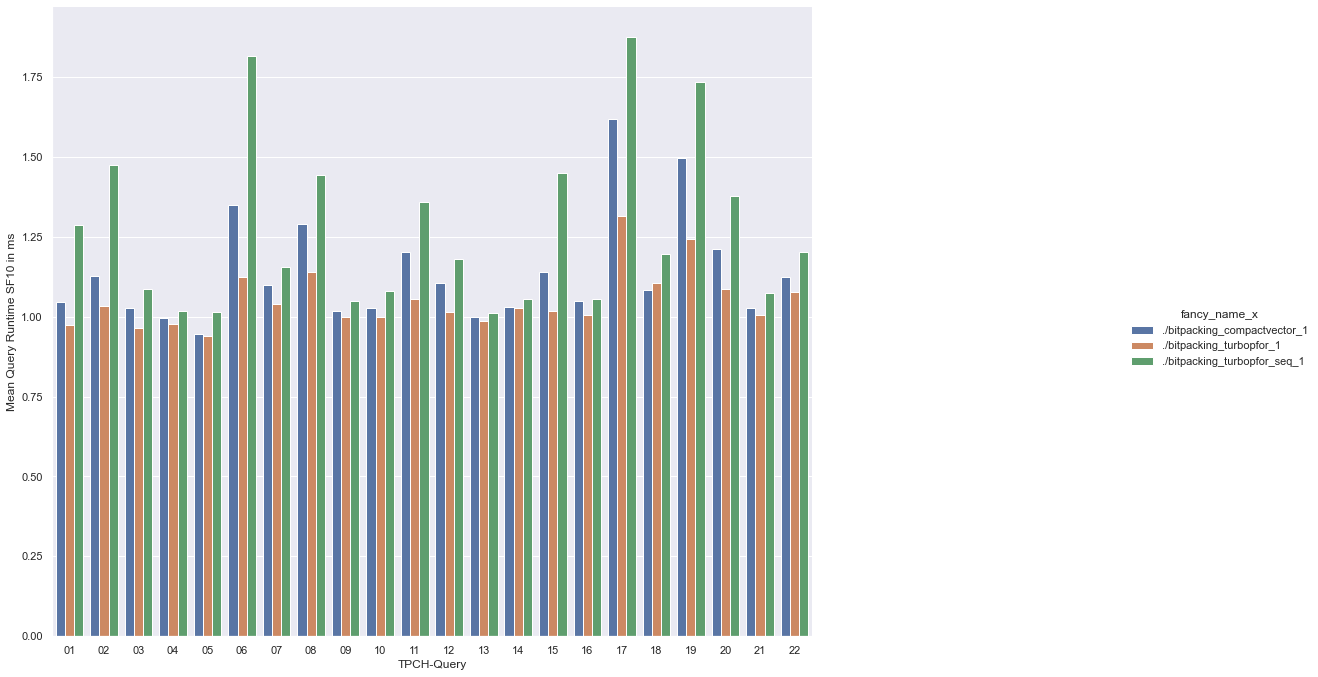

In [21]:

plot = sns.catplot(data=low_level_nolto_nodefault, x="query_name", y="duration_percentage", kind="bar", hue="fancy_name_x")
plot.set_axis_labels("TPCH-Query", "Mean Query Runtime SF10 in ms")
plot.fig.set_size_inches(20,10)
plt.savefig(f"visualizations/tpch_compression_low_level_percentage.svg", format="svg")